In [1]:
import os
# Set the OMP_NUM_THREADS environment variable to avoid memory leak
os.environ['OMP_NUM_THREADS'] = '3'

import pandas as pd
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

>**Part 1** 

In [2]:
# Read the CSV file into a DataFrame
myopia_df = pd.read_csv('Resources/myopia.csv')

In [3]:
# Drop the "MYOPIC" column from the DataFrame
myopia_df = myopia_df.drop(columns=['MYOPIC'])

In [4]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [5]:
# Fit the scaler to the dataset and transform the data
df_scaled = scaler.fit_transform(myopia_df)

In [6]:
# Convert the scaled data back to a DataFrame with the original column names
X = pd.DataFrame(df_scaled, columns=myopia_df.columns)

>**Part 2**

In [7]:
# Create a PCA instance with a desired explained variance of 90%
pca = PCA(n_components=0.9)

In [8]:
# Fit the PCA model and transform the scaled data
principal_components = pca.fit_transform(X)

In [9]:
# Check the number of principal components
num_features_original = X.shape[1]
num_features_pca = principal_components.shape[1]
print(f"Original number of features: {num_features_original}")
print(f"Number of features after PCA: {num_features_pca}")

Original number of features: 14
Number of features after PCA: 10


In [10]:
# Create a t-SNE instance
tsne = TSNE(n_components=2)

In [11]:
# Fit the t-SNE model and transform the principal components
tsne_output = tsne.fit_transform(principal_components)

c:\Users\jonow\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\jonow\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


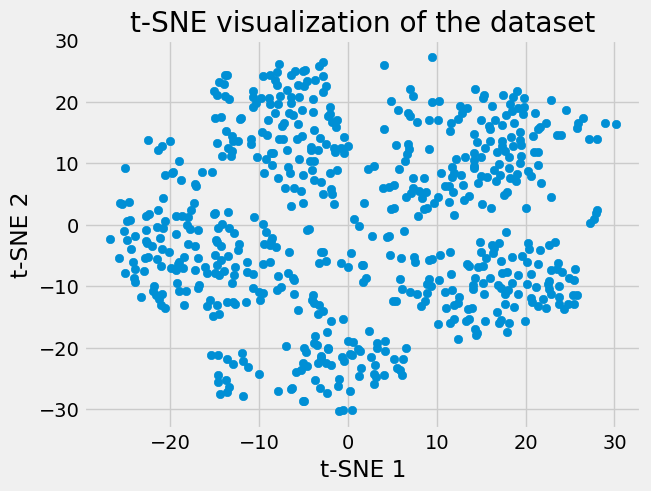

In [12]:
# Create a scatter plot of the reduced features
plt.scatter(tsne_output[:, 0], tsne_output[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE visualization of the dataset')
plt.show()

>**Part 3**

In [13]:
# Empty list to store the inertia values
inertias = []

In [14]:
# For loop to determine the inertia for each k
for k in range(1, 11):
        # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the t-SNE output
    kmeans.fit(tsne_output)

    # Add inertia value to the list
    inertias.append(kmeans.inertia_)

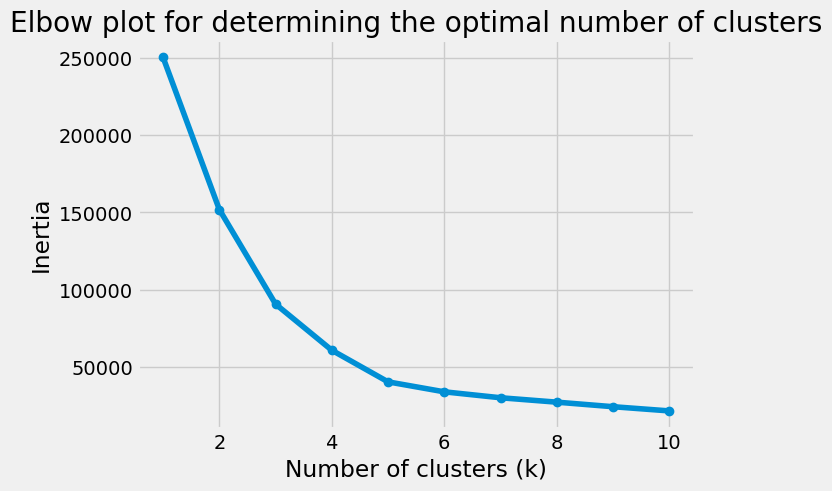

In [15]:
# Plot the elbow plot
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot for determining the optimal number of clusters')
plt.show()

>**💡**Based on the elbow plot analysis, the patients can be clustered. The optimal number of clusters appears to be at the "elbow" point on the plot, which is around k=4. This suggests that the patients can be grouped into 4 distinct clusters based on their features. 

>To confirm this, we can use the kneed library to detect the elbow point and then plot this for the end user:

In [16]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')
optimal = kneedle.elbow

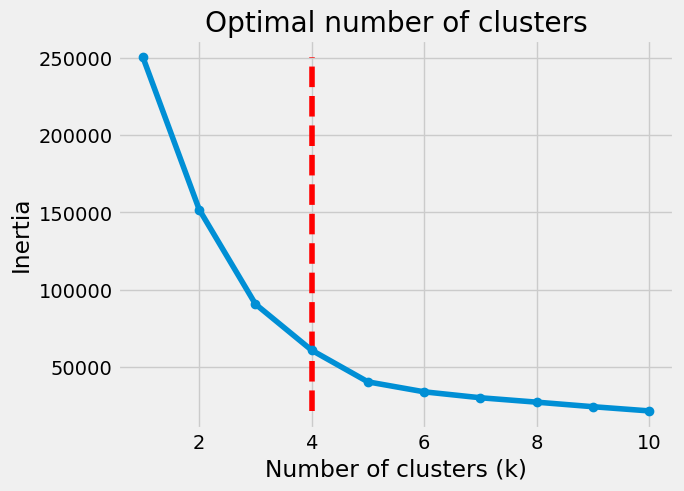

Optimal number of clusters: 4


In [17]:
plt.plot(range(1, 11), inertias, marker='o')
plt.vlines(optimal, ymin=min(inertias), ymax=max(inertias), colors='r', linestyles='dashed')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimal number of clusters')
plt.show()

print(f"Optimal number of clusters: {optimal}")